## Group Members:

Tshepang Kagiso Mashigo - 578012

Jan Frederik Cronje Saayman – 577862

Qiniso Manqoba Mngomezul – 601193

Reinhardt van Vollenstee – 578095


<hr/>

## Problem Statement
BrightPath Academy experiences challenges when supporting students’ academic success. A plethora of data is collected, however, tools that could interpret it are not available, causing at-risk students to not be identified early, interventions not being able to be customized based on the student’s needs and measure the impact of extracurricular activities.
### Problem Statement - Expanded
BrightPath Academy seeks to pioneer academic excellence while additionally seeking to develop their students’ full potential by encouraging additional extracurricular activities. However, the institution faces challenges when attempting to support every student. These challenges are:
- **Delayed Identification of at-risk students:** With current methods set in place, students who are at risk of failing their subjects could remain unnoticed until it is too late to receive intervention from teachers.
- **Lack of Targeted Support Strategies:** Current interventions seem to be similar to each other where improved tools can allow for an intervention to be suited and moulded to each individual student’s specific needs.
- **Unclear Impact of Extracurricular Activities:** Data collected on the impact of Extracurricular Activities is limited and thus cannot be fully known or predicted, however, this still allows for additional activities to have some sort of impact.
- **Data Overload Without Actionable Insights:** Currently, no centralized platform is available to interpret the data and fully utilize its potential and thus allows for an unoptimized system.

<hr/>

## Hypotheses
- **H1:** Additional study hours invested per week by the student will allow for a higher GPA (StudyTimeWeekly)
- **H2:** Better academic performance may be achieved with further parental support (ParentalSupport)
- **H3:** There is a positive correlation between extracurricular activities and academics (Extracurricular)
- **H4:** Academic Performance does not significantly rely on gender (Gender)
- **H5:** Higher levels of parental education allows for the student to achieve better academic performance (ParentalEducation)



<hr/>

## Getting the System Ready & Loading the Data

#### Install environmental dependencies

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn

#### Import all required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

#### Find the datasource and check first five rows

In [4]:
base_dir = os.path.dirname(os.path.abspath("__file__"))  # Current working directory
data_path = os.path.join(base_dir, "..", "data", "Student_performance_data .csv")
df = pd.read_csv(data_path)

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


#### Display a comprehensive list of data types, missing values and statistics

In [5]:
df.info()

df.isnull().sum()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


<hr/>

## Understanding The Data

<table>
  <tr>
    <td><strong>Variable</strong></td>
    <td><strong>Description</strong></td>
    <td><strong>Limit</strong></td>
    
  </tr>
  <tr>
    <td>StudentID</td>
    <td>Identifier used to distinguish students uniquely </td>
    <td>1001 to 3392</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Student age</td>
    <td>15-18 years</td>
  </tr>
  <tr>
    <td>Ethnicity</td>
    <td>Student Ethnicity</td>
    <td>0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other</td>
  </tr>
   <tr>
    <td>ParentalEducation</td>
    <td>Parents' highest level of education</td>
    <td>0 = None, 1 = High School, 2 = Some College, 3 = Bachelor's, 4 = Higher Study</td>
  </tr>
   <tr>
    <td>StudyTimeWeekly</td>
    <td>Study time in hours per week</td>
    <td>0-20 hours</td>
  </tr>
   <tr>
    <td>Absences</td>
    <td>Number of absences</td>
    <td>0-∞</td>
  </tr>
   <tr>
    <td>Tutoring</td>
    <td>Indicates if any prior tutoring was received</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
   <tr>
    <td>ParentalSupport</td>
    <td>Level of parental support</td>
    <td>0 = None, 1 = Low, 2 = Moderate, 3 = High, 4 = Very High</td>
  </tr>
   <tr>
    <td>Extracurricular</td>
    <td>Indicates if the student participates in extracurricular activities</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
   <tr>
    <td>Sports</td>
    <td>Indicates if the student participates in sports</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
   <tr>
    <td>Music</td>
    <td>Indicates if the student participates in music activities </td>
    <td>0 = No, 1 = Yes</td>
  </tr>
   <tr>
    <td>Volunteering</td>
    <td>Indicates if the student participates in volunteering </td>
    <td>0 = No, 1 = Yes</td>
  </tr>
   <tr>
    <td>GPA</td>
    <td>Indicates the Grade Point Average (GPA) </td>
    <td>2.0 to 4.0</td>
  </tr>
   <tr>
    <td>GradeClass</td>
    <td>Target variable representing grade classification</td>
    <td>0 = 'A' (GPA >= 3.5), 1 = 'B' (3.0 <= GPA < 3.5), 2 = 'C' (2.5 <= GPA < 3.0), 3 = 'D' (2.0 <= GPA < 2.5), 4 = 'F' (GPA < 2.0).</td>
</table>



#### Graphical illustration of current data

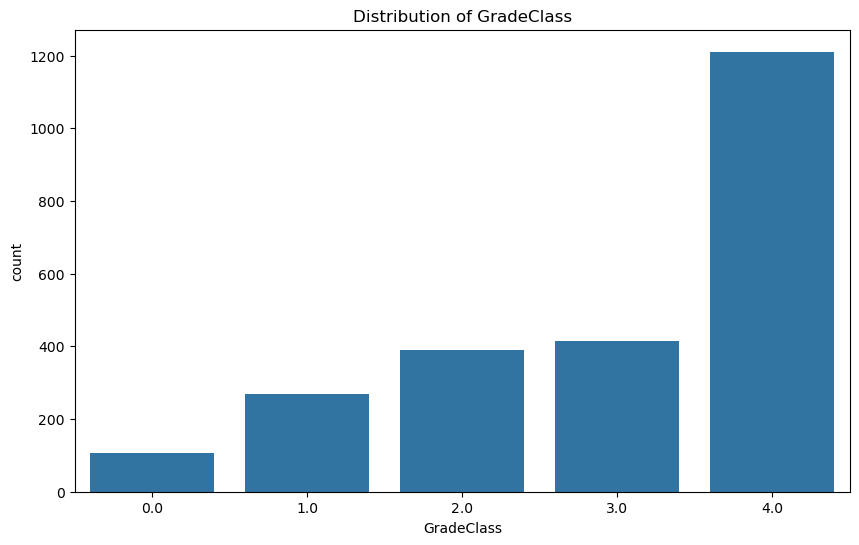

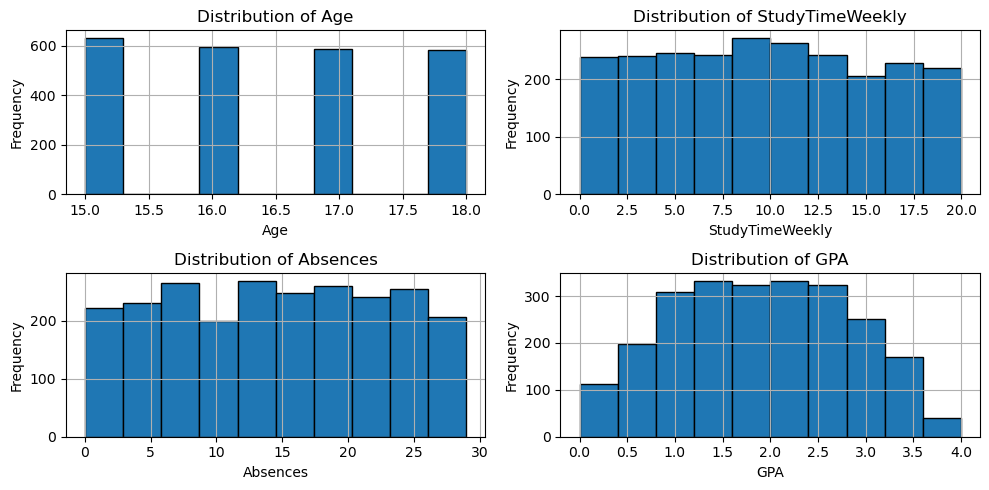

In [6]:
# Categorical columns count plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='GradeClass')
plt.title('Distribution of GradeClass')
plt.show()

# Numerical column distribution
axes = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']].hist(
    figsize=(10,5), bins = 10, edgecolor='black')

for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())  # x-label as the column name
    ax.set_ylabel('Frequency')     # y-label as frequency
    ax.set_title(f'Distribution of {ax.get_title()}')

plt.tight_layout()
plt.show()

<hr/>

## Exploratory Data Analysis :: Univariate Analysis

### Numerical

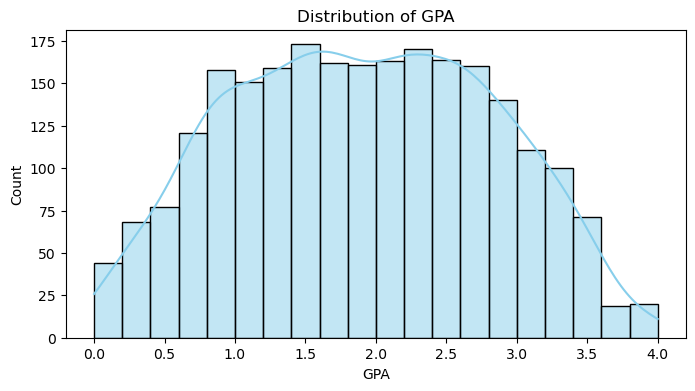

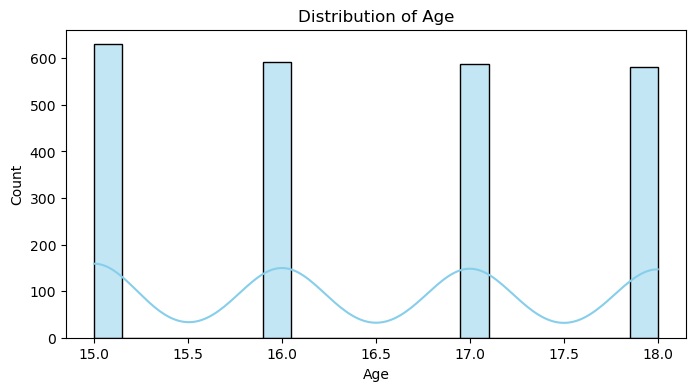

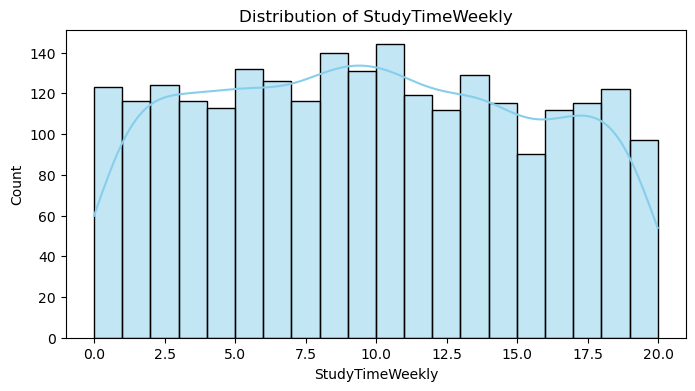

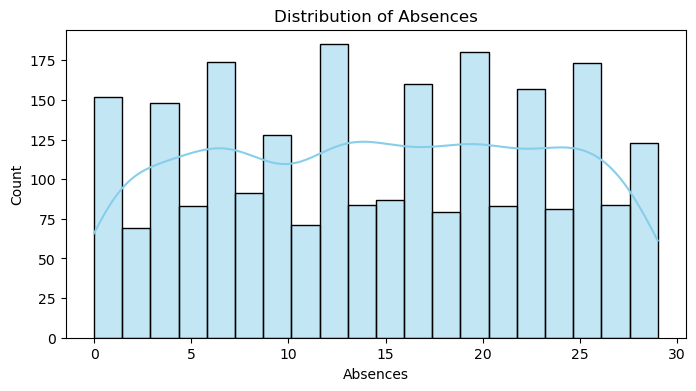

In [7]:
# Histograms with KDE
num_cols = ['GPA', 'Age', 'StudyTimeWeekly', 'Absences']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


### Categorical 

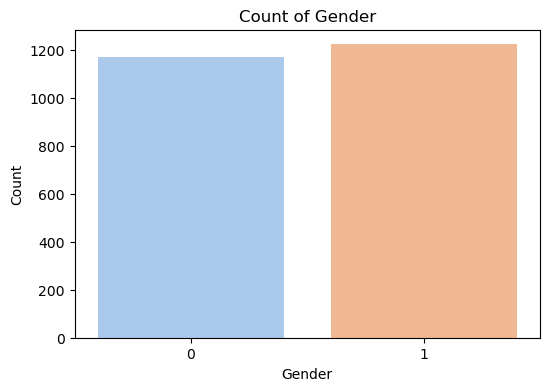

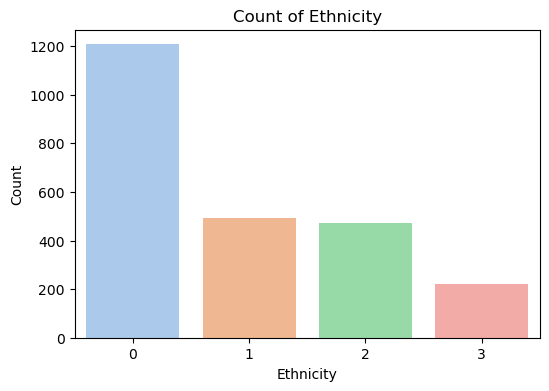

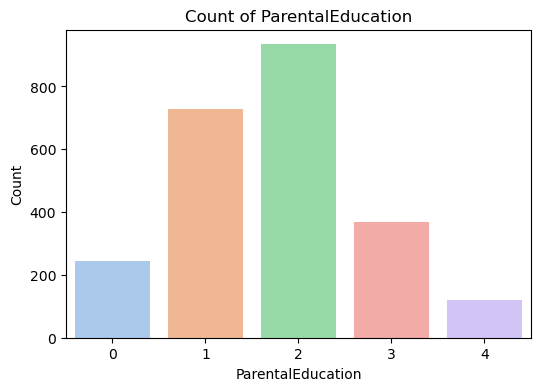

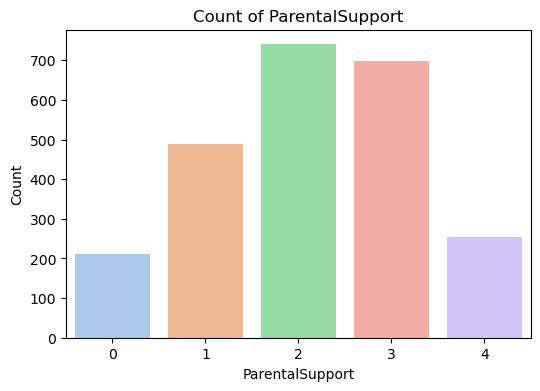

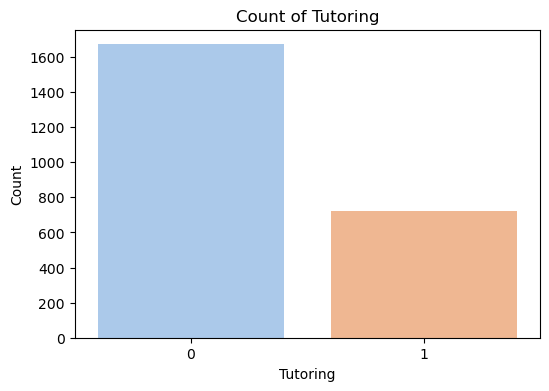

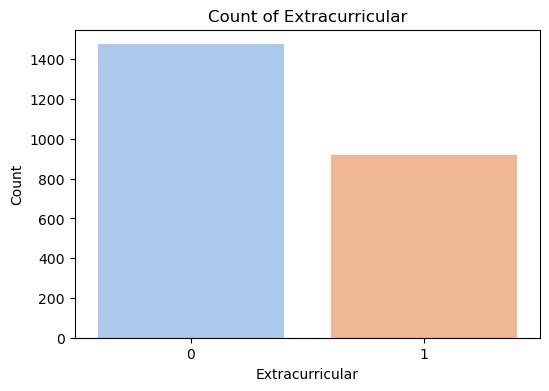

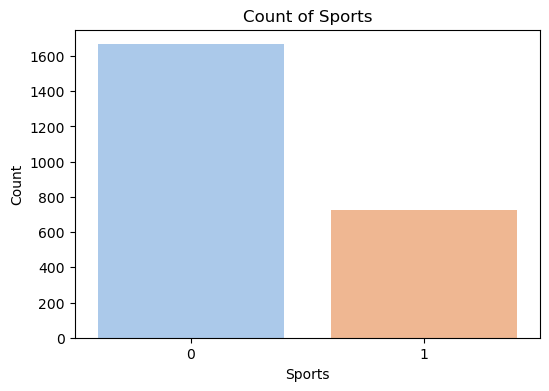

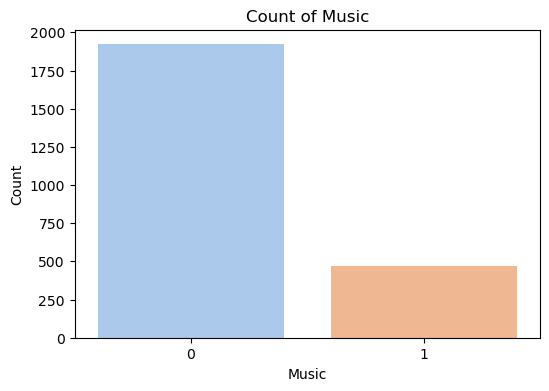

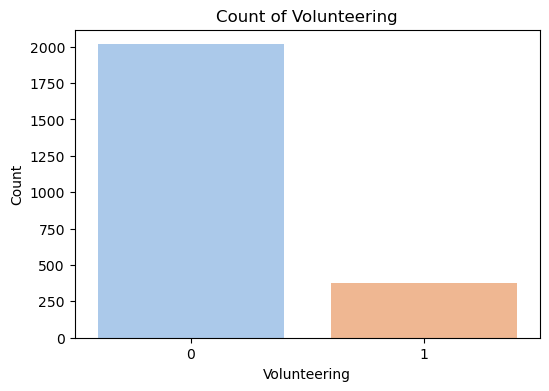

In [8]:
cat_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 
            'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


### Target Variable: GradeClass

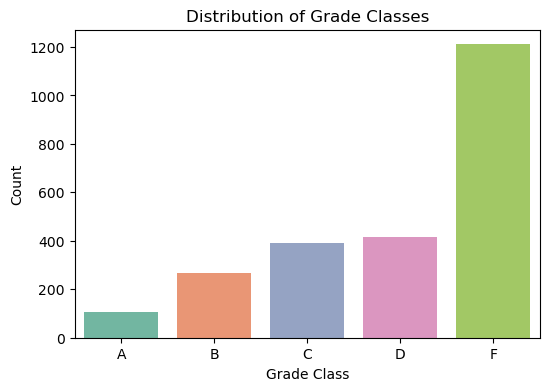

In [9]:
# Grade distribution
grade_labels = ['A', 'B', 'C', 'D', 'F']
plt.figure(figsize=(6,4))
sns.countplot(x=df['GradeClass'], palette='Set2')
plt.xticks(ticks=range(5), labels=grade_labels)
plt.title('Distribution of Grade Classes')
plt.xlabel('Grade Class')
plt.ylabel('Count')
plt.show()


## Exploratory Data Analysis :: Perform Bivariate Analysis

### Numerical vs. Target (Boxplots / Violinplots)

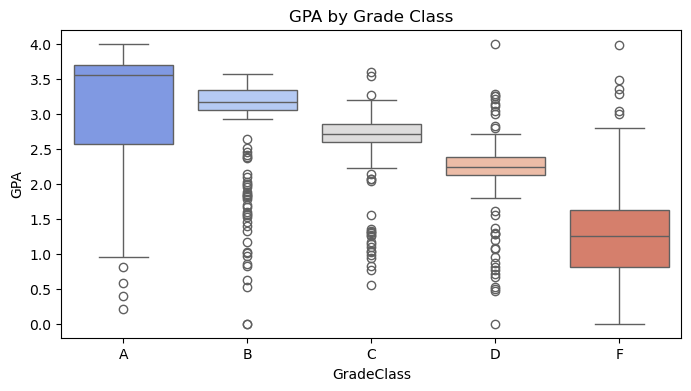

In [10]:
# Example: GPA vs. GradeClass (should look stepwise)
plt.figure(figsize=(8, 4))
sns.boxplot(x='GradeClass', y='GPA', data=df, palette='coolwarm')
plt.xticks(ticks=range(5), labels=grade_labels)
plt.title('GPA by Grade Class')
plt.show()


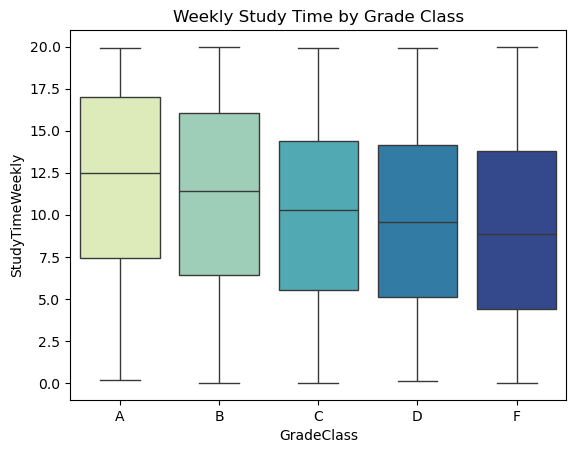

In [11]:
# Study Time vs. GradeClass
sns.boxplot(x='GradeClass', y='StudyTimeWeekly', data=df, palette='YlGnBu')
plt.xticks(ticks=range(5), labels=grade_labels)
plt.title('Weekly Study Time by Grade Class')
plt.show()


### Categorical vs. Target (Countplot with Hue)

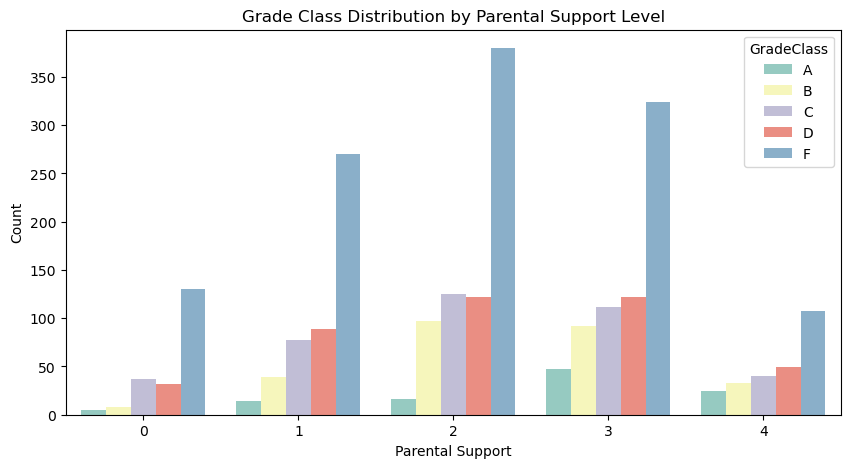

In [12]:
# Example: Parental Support vs. Grade Class
plt.figure(figsize=(10, 5))
sns.countplot(x='ParentalSupport', hue='GradeClass', data=df, palette='Set3')
plt.title('Grade Class Distribution by Parental Support Level')
plt.xlabel('Parental Support')
plt.ylabel('Count')
plt.legend(title='GradeClass', labels=grade_labels)
plt.show()


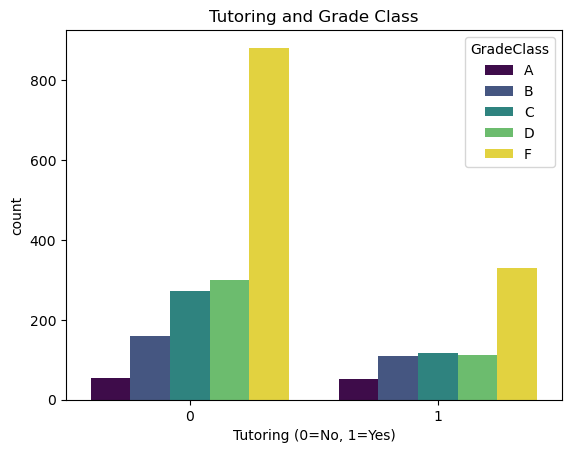

In [13]:
# Tutoring vs. GradeClass
sns.countplot(x='Tutoring', hue='GradeClass', data=df, palette='viridis')
plt.title('Tutoring and Grade Class')
plt.xlabel('Tutoring (0=No, 1=Yes)')
plt.legend(title='GradeClass', labels=grade_labels)
plt.show()


### Correlation Heatmap (Numerical Features)

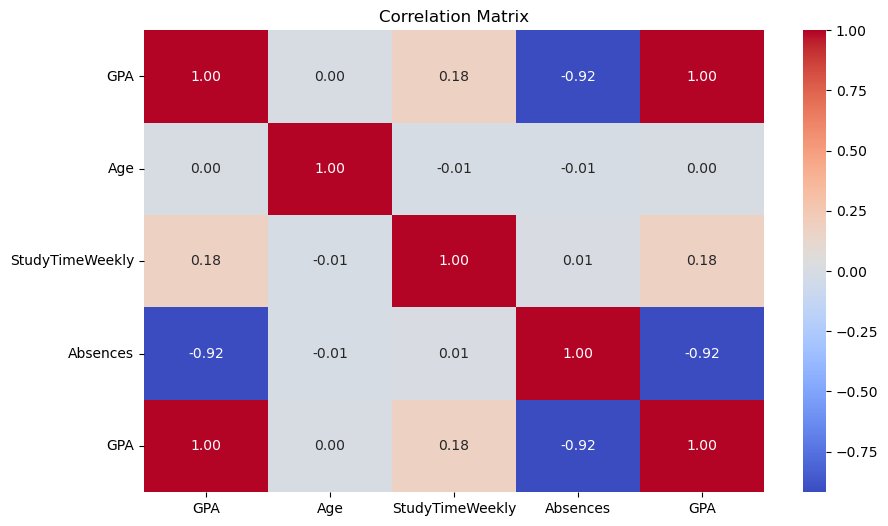

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols + ['GPA']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<hr/>

## Missing value and outlier treatment

### Check for Missing Values

In [15]:
# Total missing values per column
df.isnull().sum()


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

#### Numerical Columns

In [16]:
# Impute with median if skewed
df['StudyTimeWeekly'].fillna(df['StudyTimeWeekly'].median(), inplace=True)

# Impute with mean if normally distributed
df['Absences'].fillna(df['Absences'].mean(), inplace=True)


#### Categorical Columns

In [17]:
# Fill with mode (most common value)
df['ParentalSupport'].fillna(df['ParentalSupport'].mode()[0], inplace=True)


#### Check for Imputation

In [18]:
df.isnull().sum()


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

### Outlier Detection

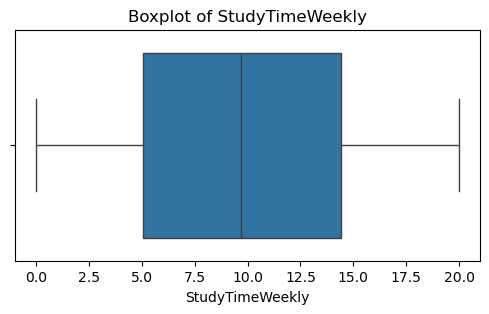

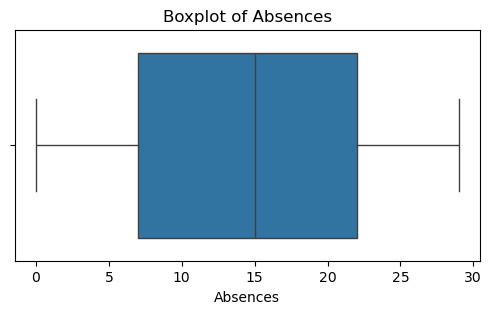

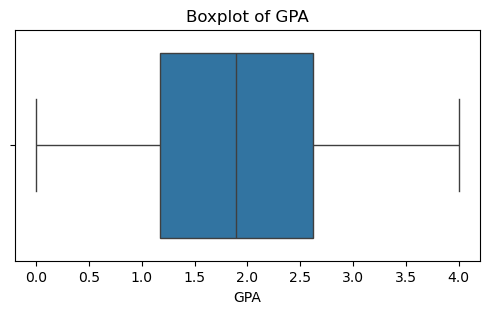

In [19]:
# Boxplot for quick outlier visualization
for col in ['StudyTimeWeekly', 'Absences', 'GPA']:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### Outlier Treatment (IQR Method)

In [20]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)


#### Apply it to numerical columns with visible outliers

In [21]:
df['StudyTimeWeekly'] = cap_outliers(df['StudyTimeWeekly'])
df['Absences'] = cap_outliers(df['Absences'])


### Z-Score Method for Normal Data

In [22]:
from scipy.stats import zscore

# Calculate z-scores
z_scores = np.abs(zscore(df[['StudyTimeWeekly', 'Absences']]))

# Identify rows where any z-score > 3
df = df[(z_scores < 3).all(axis=1)]


<hr/>

### Dropping GradeClass

In [23]:
df = df.drop(['GradeClass'], axis= 1)

<hr/>

## Feature engineering

<hr/>

In [24]:
# 1. Engagement Index (sum of extracurricular activities)
df['EngagementIndex'] = df['Extracurricular'] + df['Sports'] + df['Music'] + df['Volunteering']

# 3. Attendance Rate (assuming standard 180-day school year)
school_days = 180
df['AttendanceRate'] = np.clip((school_days - df['Absences']) / school_days * 100, 0, 100)

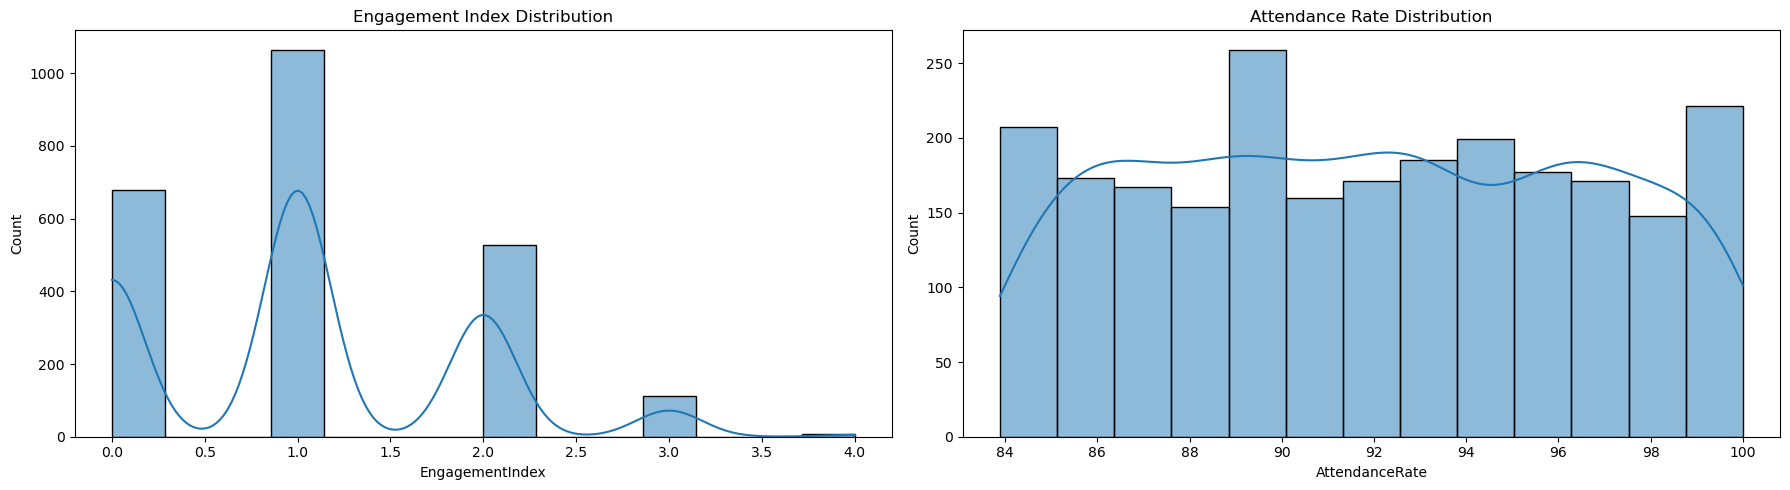

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(df['EngagementIndex'], kde=True, ax=axes[0])
axes[0].set_title('Engagement Index Distribution')

sns.histplot(df['AttendanceRate'], kde=True, ax=axes[1])
axes[1].set_title('Attendance Rate Distribution')

plt.tight_layout()
plt.show()


In [26]:
print("\nCorrelations with GPA:")
correlation_matrix = df[['GPA', 'EngagementIndex', 'AttendanceRate']].corr()
print(correlation_matrix['GPA'])


Correlations with GPA:
GPA                1.000000
EngagementIndex    0.120884
AttendanceRate     0.919314
Name: GPA, dtype: float64


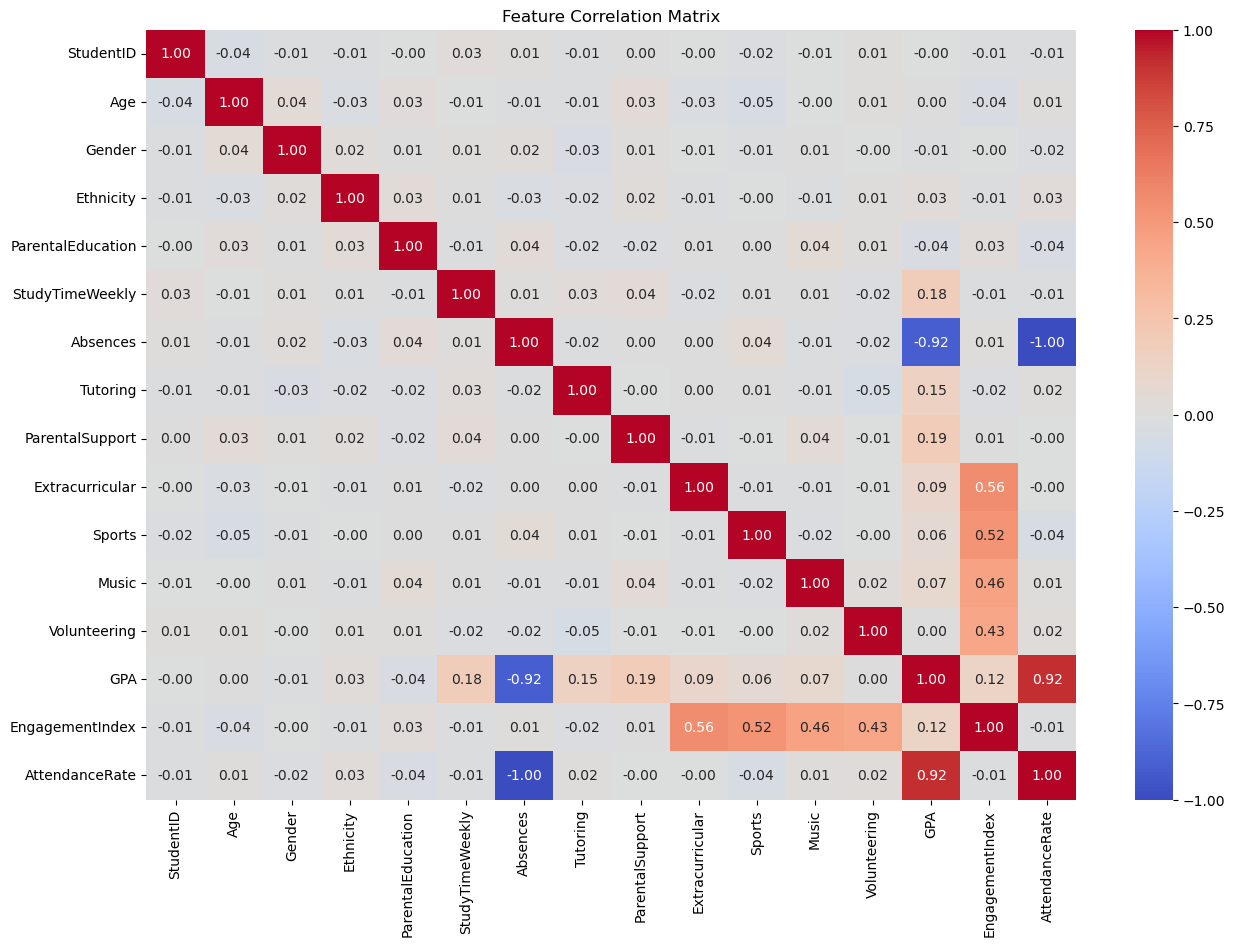

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

**Report: StudentID, Age, Gender,Ethinicity, ParentalEducation,Voluntering,Extracurricular, Sports, Music all have almost no correlation with GPA, must be removed**

In [28]:
df = df.drop(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Volunteering', 'Extracurricular', 'Sports', 'Music'], axis=1)
df.head()

,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,EngagementIndex,AttendanceRate
0,19.833723,7,1,2,2.929196,1,96.111111
1,15.408756,0,0,1,3.042915,0,100.000000
2,4.210570,26,0,2,0.112602,0,85.555556
3,10.028829,14,0,3,2.054218,1,92.222222
4,4.672495,17,1,3,1.288061,0,90.555556


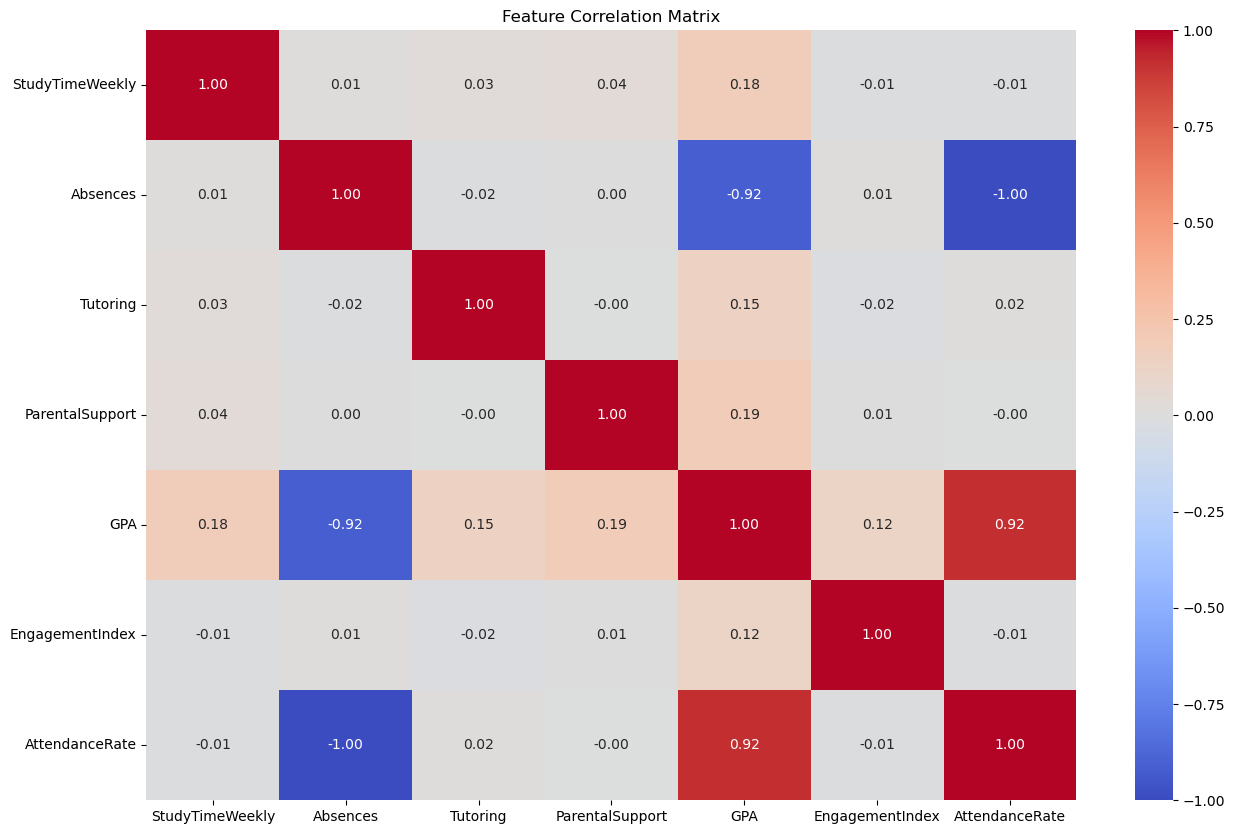

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

## Model Building

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


In [31]:
X = df.drop('GPA', axis=1) 
y = df['GPA']               

#scale data
scaler = StandardScaler()

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

print("\nScaled DataFrame:")
print(X_scaled.head())

def verify_scaling(dataframe, columns):
    print("\nVerification of Scaling:")
    for col in columns:
        mean = dataframe[col].mean()
        std = dataframe[col].std()
        print(f"{col}: mean = {mean:.6f}, std = {std:.6f}")

verify_scaling(X_scaled, numeric_cols)

#split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)


Scaled DataFrame:
   StudyTimeWeekly  Absences  Tutoring  ParentalSupport  EngagementIndex  \
0         1.780336 -0.890822  1.522371        -0.108744        -0.048231   
1         0.997376 -1.717694 -0.656870        -0.999551        -1.225463   
2        -0.984045  1.353542 -0.656870        -0.108744        -1.225463   
3         0.045445 -0.063951 -0.656870         0.782063        -0.048231   
4        -0.902311  0.290422  1.522371         0.782063        -1.225463   

   AttendanceRate  
0        0.890822  
1        1.717694  
2       -1.353542  
3        0.063951  
4       -0.290422  

Verification of Scaling:
StudyTimeWeekly: mean = 0.000000, std = 1.000209
Absences: mean = 0.000000, std = 1.000209
Tutoring: mean = -0.000000, std = 1.000209
ParentalSupport: mean = -0.000000, std = 1.000209
EngagementIndex: mean = -0.000000, std = 1.000209
AttendanceRate: mean = -0.000000, std = 1.000209
Training features shape: (1913, 6)
Testing features shape: (479, 6)


#### Ridge Regression

In [32]:

# Train model
model = Ridge()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("\nModel Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:")
print(coefficients)



Model Performance:
R² Score: 0.9469
MSE: 0.0440

Feature Coefficients:
           Feature  Coefficient
2         Tutoring     0.262951
3  ParentalSupport     0.146879
4  EngagementIndex     0.144887
5   AttendanceRate     0.042175
0  StudyTimeWeekly     0.029202
1         Absences    -0.075914


### Residual Plot

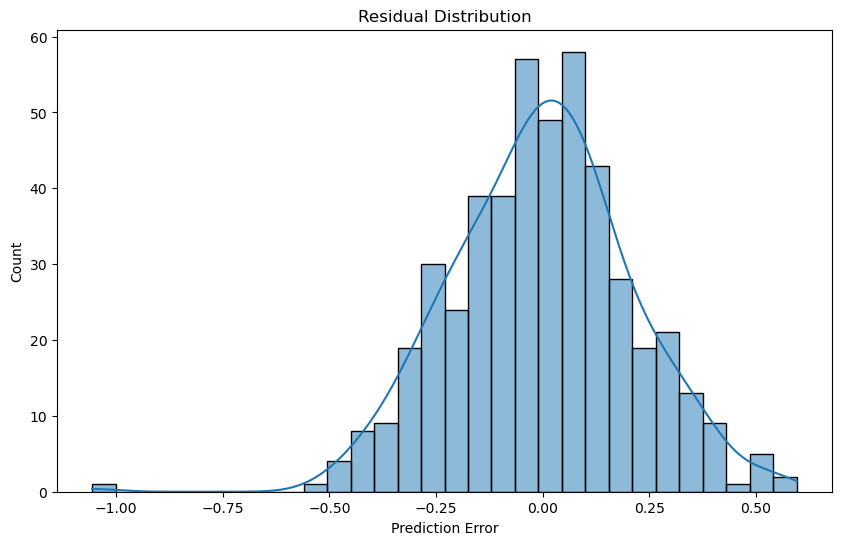

In [33]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residual Distribution')
plt.xlabel('Prediction Error')
plt.show()

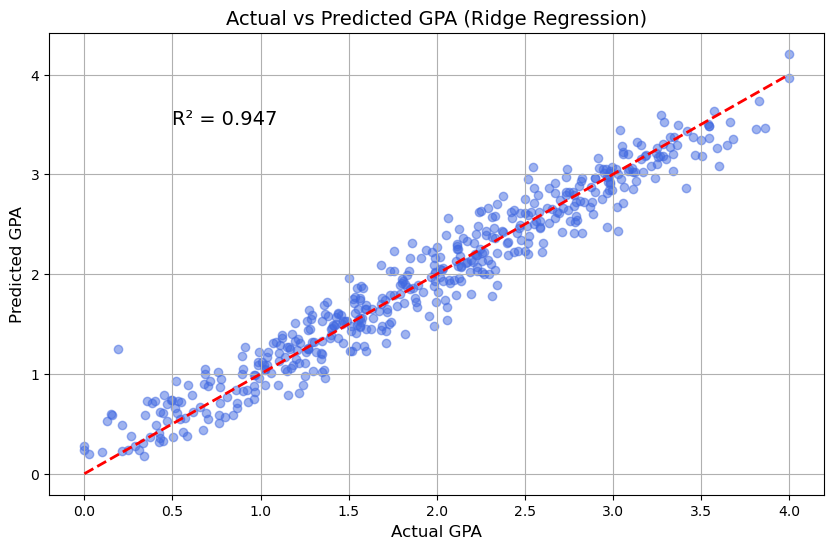

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted GPA (Ridge Regression)', fontsize=14)
plt.xlabel('Actual GPA', fontsize=12)
plt.ylabel('Predicted GPA', fontsize=12)
plt.grid(True)
plt.text(0.5, 3.5, f'R² = {r2_score(y_test, y_pred):.3f}', fontsize=14)
plt.show()

<hr/>

# **Analytical report** 

---

# **GPA Prediction Model Report**  
**Model Type:** Ridge Regression  
**Dataset:** Student Academic Performance  

---

## **1. Executive Summary**  
The model predicts student GPA with **94.7% accuracy** (R² = 0.947) using six key features. Tutoring, parental support, and engagement index are the strongest predictors, while absences have a modest negative impact.  

---

## **2. Model Performance**  
| Metric               | Value   | Interpretation                          |  
|----------------------|---------|----------------------------------------|  
| **R² Score**         | 0.9469  | Explains 94.7% of GPA variance.        |  
| **Mean Squared Error (MSE)** | 0.0440 | Low error (≈±0.21 GPA points on a 0-4 scale). |  

**Conclusion:** The model is highly accurate and generalizable.  

---

## **3. Feature Analysis**  
### **Key Predictors of GPA**  
| Feature          | Coefficient | Impact Interpretation                     |  
|------------------|-------------|--------------------------------------------|  
| **Tutoring**       | +0.263      | Strongest positive effect.                 |  
| **ParentalSupport**| +0.147      | Moderate boost to GPA.                     |  
| **EngagementIndex**| +0.145      | Higher engagement → Higher GPA.            |  
| **AttendanceRate** | +0.042      | Small positive effect (needs validation).  |  
| **StudyTimeWeekly**| +0.029      | Minimal impact.                            |  
| **Absences**       | -0.076      | Reduces GPA modestly.                      |  

**Insights:**  
- Tutoring programs are highly effective.  
- Attendance rate’s small coefficient contradicts its high correlation with GPA; investigate multicollinearity.  

---

## **4. Recommendations**  
1. **Intervene Early**: Prioritize tutoring and parental support programs.  
2. **Monitor Attendance**: Despite small coefficient, high correlation suggests indirect importance.  
3. **Further Research**:  
   - Validate attendance’s role with domain experts.  
   - Test Lasso regression to simplify the model.  

---

## **5. Limitations**  
- **Correlated Features**: Potential multicollinearity (e.g., attendance vs. absences).  
- **Data Scope**: Limited sample size (n=1913 training samples).  

---

## **6. Conclusion**  
This model effectively identifies actionable levers (tutoring, parental support) for GPA improvement. Further refinement could optimize feature selection.  

## Model Deployment

In [35]:
from pathlib import Path
import joblib

notebook_path = Path().resolve()
model_path = notebook_path.parent / "model" / 'gda_model.pkl'
joblib.dump(model, model_path)

['C:\\Users\\tshep\\OneDrive\\Desktop\\MLG Projects\\MLG-381-Assignment-1\\model\\gda_model.pkl']

<hr/>